# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from google_play_scraper import reviews, Sort
from collections import Counter
from io import StringIO
import requests
from wordcloud import WordCloud
import csv
import string
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
data = pd.read_csv('amazon_reviews.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **a. Check general information**

In [3]:
data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9d0646ff-ca6d-468b-b228-2bf8be92dd05,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It is vee good to have,5,0,30.8.0.100,2025-05-02 16:58:24,NaN,NaN,30.8.0.100
1,32f69cf2-14ab-4e48-a3e8-dde6d18c74a3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"We demand transparent pricing, with increases ...",1,3,30.8.0.100,2025-05-02 16:11:59,NaN,NaN,30.8.0.100
2,4388488f-82ed-464b-acff-a59da4588076,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Repeatedly sent out the wrong products even af...,1,0,30.8.0.100,2025-05-02 16:06:46,NaN,NaN,30.8.0.100
3,bb056f30-0214-45ac-b0a0-cb07df737d59,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,best ever,5,0,30.8.0.100,2025-05-02 15:44:27,NaN,NaN,30.8.0.100
4,f7cefb31-026b-4af2-9f66-5494b8d6f96b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,never had any problems.,5,0,30.8.0.100,2025-05-02 15:31:00,NaN,NaN,30.8.0.100
5,47611fc9-283c-457b-a697-787cfb48beae,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"man, please open an amazon branch in nepal too...",4,0,NaN,2025-05-02 15:20:11,NaN,NaN,NaN
6,8386f325-c942-46a9-bef0-8df0daf9932a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nothing loads. it's always that stupid dog and...,1,2,30.8.0.100,2025-05-02 15:17:36,NaN,NaN,30.8.0.100
7,bc815a95-1b47-4b9e-8e70-89d9bb94e73b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,VAT at different rates can affect the final pr...,4,0,30.8.0.100,2025-05-02 14:32:05,NaN,NaN,30.8.0.100
8,1e4f0b9b-cbe7-40e3-a64c-d7976f9e8e10,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,they care about u and their products,5,0,30.8.0.100,2025-05-02 14:27:12,NaN,NaN,30.8.0.100
9,9cc61133-0b0e-4902-b2dd-88a76ea4f769,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Deliberately made it impossible to unsubscribe...,1,0,30.8.0.100,2025-05-02 14:25:50,NaN,NaN,30.8.0.100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              10000 non-null  object 
 1   userName              10000 non-null  object 
 2   userImage             10000 non-null  object 
 3   content               9999 non-null   object 
 4   score                 10000 non-null  int64  
 5   thumbsUpCount         10000 non-null  int64  
 6   reviewCreatedVersion  8539 non-null   object 
 7   at                    10000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            8539 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


### **b. Check missing values**

In [5]:
data.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     1
score                       0
thumbsUpCount               0
reviewCreatedVersion     1461
at                          0
replyContent            10000
repliedAt               10000
appVersion               1461
dtype: int64

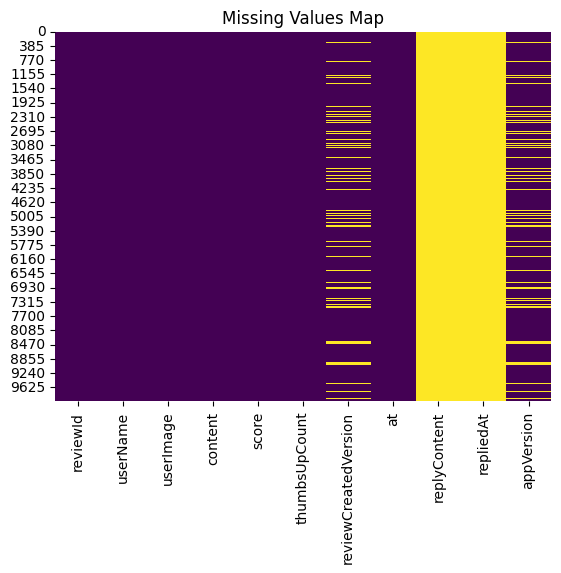

In [6]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Map")
plt.show()

Several features such as `reviewCreatedVersion`, `replyContent`, `repliedAt`, and `appVersion` contain many missing values. Since they are not crucial for sentiment analysis, they can be removed after performing EDA.

### **c. Check duplicates**

In [7]:
data.duplicated().sum()

np.int64(0)

Because there are no duplicates, it is reasonable to assume that each review is unique and represents a distinct user opinion.

### **d. Score distribution**

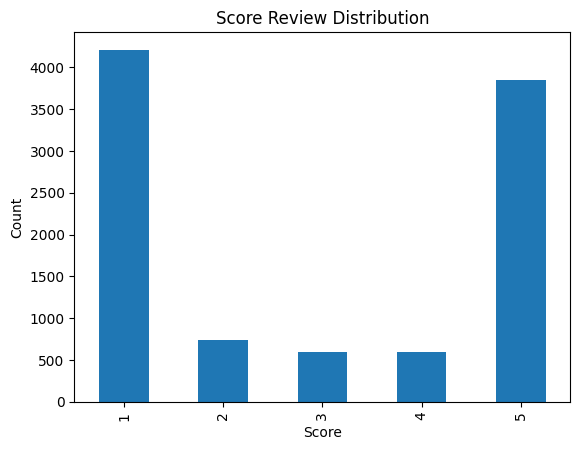

In [8]:
data['score'].value_counts().sort_index().plot(kind='bar', title='Score Review Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

From the distribution of the scores visualized above, an initial conclusion can be drawn that a large number of reviews are given a score of 1, indicating a significant amount of negative sentiment. On the other hand, scores of 2, 3, and 4 are quite similar, suggesting a moderate sentiment with some variation in the reviews. Finally, score 5 is slightly below 4, indicating a relatively lower number of positive reviews, which can be interpreted as a less frequent but strong positive sentiment.

### **e. Content length and word count**

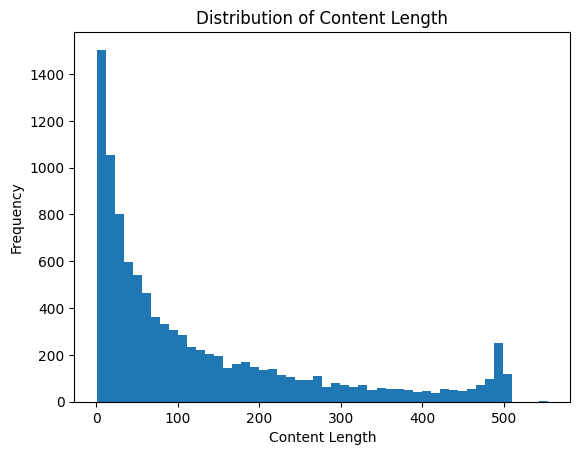

In [9]:
data['content_length'] = data['content'].astype(str).apply(len)
data['content_length'].plot(kind='hist', bins=50, title='Distribution of Content Length')
plt.xlabel('Content Length')
plt.show()

It can be observed that the number of characters in the range of 0-100 is the highest, and although the decrease in character count is steady, there is a slight increase near 500 words. However, counts above 550 can be considered very few.

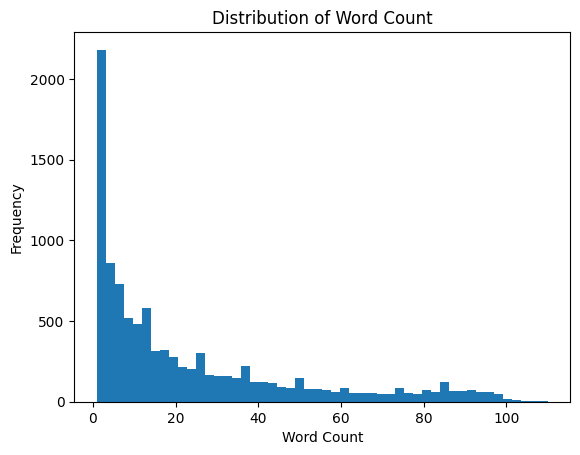

In [10]:
data['word_count'] = data['content'].astype(str).apply(lambda x: len(x.split()))
data['word_count'].plot(kind='hist', bins=50, title='Distribution of Word Count')
plt.xlabel('Word Count')
plt.show()

The word count distribution shows that the highest number of words falls between 0 and 20. However, there is a slight increase in word count for every subsequent range of 20, though it is not significant.

### **f. Date reviews**

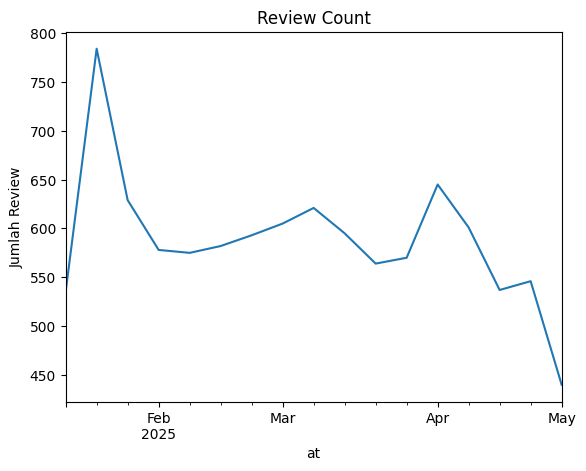

In [11]:
data['at'] = pd.to_datetime(data['at'])
data.set_index('at')['score'].resample('W').count().plot(title='Review Count')
plt.ylabel('Jumlah Review')
plt.show()

The line plot shows that the scraped data spans over a 4-month period, from mid-January 2025 to May. It can be observed that towards the end of January, the number of reviews surged significantly. Then, there was a decline in February, followed by a slight increase in early March and April. Finally, there was a significant drop at the end of April and May.

### **g. Thumbs-up reviews**

In [12]:
data.sort_values(by='thumbsUpCount', ascending=False).head(10)[['content', 'score', 'thumbsUpCount']]

,content,score,thumbsUpCount
2605,No support for dark mode as of April 2025 desp...,1,5193
727,"WARNING!!! APP IS TRACKER, DATA MINER SPYWARE....",1,1330
9948,Can you please turn off these regular 'How abo...,2,1131
8898,Not working on Pixel 9 Pro XL. None of the but...,4,1016
308,I'm so tired of the same old products being do...,1,890
9832,Updating review to reflect previous issues hav...,5,793
6127,What is going on while at checkout? I add from...,2,689
3556,"I still loathe multi-billionaire Jeff Bezos, b...",5,665
5777,I hate the Amazon app so much. Current beef is...,1,611
5095,Amazon app is really bad these days. The user ...,1,547


From the 10 thumbs-up data, it can be concluded that the application currently receives a significant number of negative reviews, as indicated by the high number of thumbs-ups on reviews with a score of 1. In contrast, the number of reviews with scores of 4 and 5 is low.

### **h. Top 15 app version**

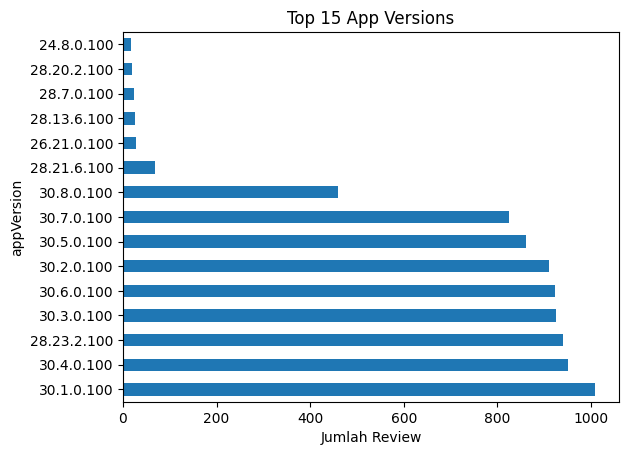

In [33]:
data['appVersion'].value_counts().head(15).plot(kind='barh', title='Top 15 App Versions')
plt.xlabel('Jumlah Review')
plt.show()

Most of the users who left reviews are using versions between 30.7.0.100 and 30.1.0.100, while reviews for versions 24.8.0.100, 30.8.0.100, and earlier versions are relatively few. This is likely because most users are now using devices that meet the required specifications.

### **i. Early Word Cloud (Before Preprocessing)**

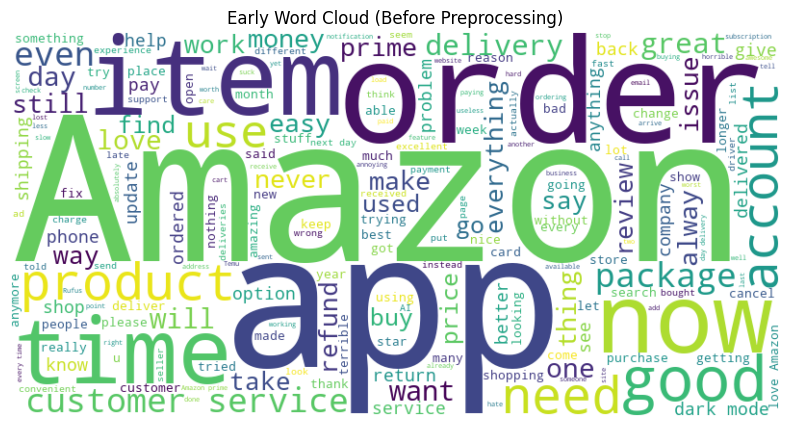

In [34]:
text = ' '.join(data['content'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Early Word Cloud (Before Preprocessing)')
plt.show()

Based on the word cloud visualization, it can be seen that many words are related to the application, as it is an online ordering app, such as `Amazon`, `order`, `app`, `item`, and others. This visualization will later be used as a comparison for the data after preprocessing.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
#data.drop(columns=['reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'], inplace=True)